# 주성분 분석
**PCA(principal component analysis)** 는 가장 인기 있는 차원 축소 알고리즘임.  
먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영하는 것임.  
> PCA는 분산이 최대로 보존되는 축을 선택함.  
즉 원본 데이터셋과 투영된 데이터 사이의 평균 제곱 거리를 최소화하는 축들을 이용함.  
1. 이런 식으로 가장 높은 분산을 보존하는 축을 찾고  
2. 그 축에 직교하는 축 중에서 또 가장 높은 분산을 보존하는 축을 찾고  
3. 위 반복

이 i번째 축들을 **i번째 주성분(pincipal component)** 이라고 함.  
이 주성분들은 학습 데이터셋에 대한 **특잇값 분해** 로 구함.

In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784", version=1)
x, y = mnist["data"], mnist["target"]
x_train, x_test = x[: 60000], x[60000: ]
y_train, y_test = y[: 60000], y[60000: ]

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=20)
x_train20 = pca.fit_transform(x_train)

In [3]:
x_train.shape, x_train20.shape

((60000, 784), (60000, 20))

In [6]:
pca.explained_variance_ratio_, sum(pca.explained_variance_ratio_)

(array([0.09704664, 0.07095924, 0.06169089, 0.05389419, 0.04868797,
        0.04312231, 0.0327193 , 0.02883895, 0.02762029, 0.02357   ,
        0.0210919 , 0.02022991, 0.01715812, 0.01692111, 0.01578634,
        0.01482943, 0.01324555, 0.01276857, 0.01186828, 0.01152606]),
 0.6435750606009506)

**explained_variance_ratio_** 는 저장된 주성분의 설명된 분산의 비율을 나타냄.  
이는 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타냄.  
모두 합쳐서 64%정도 되는데 784차원 중의 20차원만 갖고 64%의 분산을 보존하니 차원축소의 효과가 큰 셈임

---
## 적절한 차원 수 찾기
축소할 차원 수를 임의로 정하기 보다는 충분한 분산이 되는 차원 수를 선택하는 것이 바람직함(예를 들어 95%)  
다음 코드는 차원을 일단 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95% 유지하는데 필요한 차원 수를 계산함.

In [8]:
import numpy as np

pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum

array([0.09704664, 0.16800588, 0.22969677, 0.28359097, 0.33227894,
       0.37540125, 0.40812055, 0.4369595 , 0.4645798 , 0.4881498 ,
       0.5092417 , 0.52947161, 0.54662979, 0.56355091, 0.57933732,
       0.59416685, 0.60741246, 0.62018143, 0.63205406, 0.6435809 ,
       0.65424256, 0.66430969, 0.67384542, 0.68297086, 0.69180491,
       0.7001981 , 0.70832389, 0.71618755, 0.72363488, 0.73054347,
       0.73712441, 0.74360589, 0.74963204, 0.75549786, 0.76119807,
       0.76663435, 0.77169222, 0.7765708 , 0.7813851 , 0.78610776,
       0.79067523, 0.79512359, 0.7993086 , 0.80329076, 0.8071405 ,
       0.81089154, 0.81451162, 0.81802754, 0.82142812, 0.82464686,
       0.82783703, 0.83096508, 0.83392491, 0.83681446, 0.83965576,
       0.84237012, 0.84506533, 0.84765006, 0.85018776, 0.85263557,
       0.85504063, 0.85743326, 0.85973735, 0.86195267, 0.86408988,
       0.86616213, 0.86819256, 0.87016038, 0.87208891, 0.87397523,
       0.875845  , 0.87765583, 0.87943146, 0.88118044, 0.88283

**np.cumsum** 은 주어진 배열의 원소들의 누적 합을 표시함. row와 column의 구분은 없어지고 그냥 순서대로 함

In [9]:
target_d = np.argmax(cumsum >= 0.95) + 1
target_d

154

In [10]:
re_pca = PCA(n_components=target_d)
re_pca.fit(x_train)
sum(re_pca.explained_variance_ratio_)

0.9498705575890153

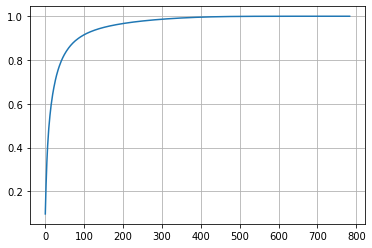

In [13]:
import matplotlib.pyplot as plt
plt.plot(cumsum)
plt.grid()
plt.show()

축적된 분산 합을 보면서 원하는 축적값에 해당하는 차원수를 선택해도 좋음  

---
## PCA를 이용한 데이터 압축 및 복원
차원을 축소하면 학습 데이터셋의 크기가 줄어듦.  
이렇게 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하면 다시 원래의 차원수로 되돌릴 수 있음.  
> 물론 처음 축소할 때 일정량의 정보를 잃어버렸기 때문에 **완벽한 복원은 할 수 없음**  
하지만 축적분산값이 높을 수록 **매우 비슷할 것**  
  
원본 데이터와 복원된 데이터 사이의 평균 제곱 거리를 **재구성 오차** 라고 함.

In [14]:
pca = PCA(n_components=target_d)
x_train_reduced = pca.fit_transform(x_train)
x_train_recovered = pca.inverse_transform(x_train_reduced)

In [15]:
x_train_reduced.shape, x_train_recovered.shape

((60000, 154), (60000, 784))

In [40]:
import numpy as np

col = 10
row = 10

def plot_mnist_img(x):
    img = np.array([])
    for r in range(row):
        temp_row_digit = x[r*10]
        temp_row_img = temp_row_digit.reshape(28, 28)
        for c in range(1, col):
            idx = r*10 + c
            temp_digit = x[idx]
            temp_digit_img = temp_digit.reshape(28, 28)
            temp_row_img = np.append(temp_row_img, temp_digit_img, axis=1)
        if r == 0:
            img = temp_row_img
        else:
            img = np.append(img, temp_row_img, axis=0)

    plt.imshow(img, )
    plt.show()

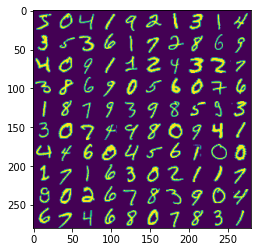

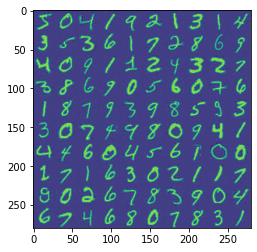

In [41]:
plot_mnist_img(x_train[:100].to_numpy())
plot_mnist_img(x_train_recovered[:100])

---
## 랜덤 PCA
**svd_solver** 매개변수를 **"randomized"** 로 지정하면 사이킷런은 **랜덤 PCA** 라는 확률적 알고리즘을 사용해  
처음 d개의 주성분에 대한 근삿값을 빠르게 찾음. 이 알고리즘에서 **d가 n보다 작으면 작을수록 일반 PCA보다 훨씬 빠름**

In [43]:
rnd_pca = PCA(n_components=target_d, svd_solver="randomized")
x_train_reduced = rnd_pca.fit_transform(x_train)

---
# 커널 PCA
SVM을 공부할 때 샘플을 매우 높은 고차원 공간으로 매핑하여 비선형 분류와 회귀를 가능하게 하는 커널 트릭을 다뤘었음.  
고차원 특성 공간에서의 선형 결정 경계는 원본 공간에서의 복잡한 비선형 결정 경계에 해당한다는 것을 배웠음.  
같은 기법을 PCA에 적용해 차원 축소를 위한 복잡한 비선형 투영을 수행할 수 있음.  
이를 **커널 PCA (kPCA)** 라고 함.  
> 이 기법은 투영된 후에 샘플의 군집을 유지하거나 꼬인 매니폴드에 가까운 데이터셋을 펼칠 때도 유용함.

In [45]:
from sklearn.datasets import make_swiss_roll
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [65]:
from sklearn.decomposition import KernelPCA

linear_pca = PCA(n_components=2)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
sigmoid_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001)

In [66]:
x_reduced_linear = linear_pca.fit_transform(x)
x_reduced_rbf = rbf_pca.fit_transform(x)
x_reduced_sigmoid = sigmoid_pca.fit_transform(x)

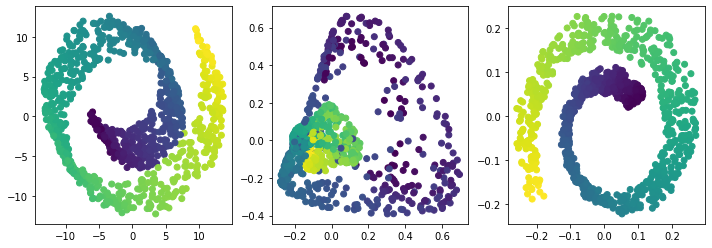

In [67]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.scatter(x_reduced_linear[:, 0], x_reduced_linear[:, 1], c=t)
plt.subplot(1, 3, 2)
plt.scatter(x_reduced_rbf[:, 0], x_reduced_rbf[:, 1], c=t)
plt.subplot(1, 3, 3)
plt.scatter(x_reduced_sigmoid[:, 0], x_reduced_sigmoid[:, 1], c=t)
plt.show()

커널에 따라 3D 데이터를 2D 데이터로 축소시킨 모습. 일반 PCA는 커널="linear"와 같음.  
커널을 사용할 경우 해당 **커널의 파라미터(gamma같은) 조절이 매우 중요한 듯**  
그리드 탐색을 이용해 가장 좋은 파라미터를 선택할 수 있음

In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg", LogisticRegression())
])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf", "sigmoid"]
}]

grid_search = GridSearchCV(clf, param_grid, cv=3)

In [77]:
y = t > 6.9
grid_search.fit(x, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [78]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

---
## 커널 PCA의 데이터 복원
가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있음.  
하지만 재구성은 선형 PCA만큼 쉽지 않다고 함. 원리는 잘 모르겠지만 재구성하는 방법은 **fit_inverse_transform** 을 True로 지정하면 됨.

In [79]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                   fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)

In [80]:
x_recovered = rbf_pca.inverse_transform(x_reduced)

In [81]:
x_recovered.shape

(1000, 3)

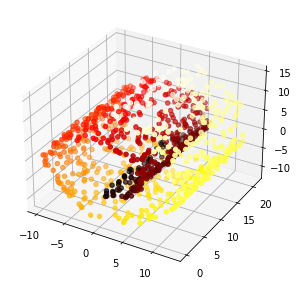

In [82]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(x_recovered[:, 0], x_recovered[:, 1], x_recovered[:, 2], c=t, cmap=plt.cm.hot)
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x, x_recovered)

8.206764007715908e-27

거의 원본 데이터에 가깝게 잘 복원한 모습  
재구성 원상 오차를 최소화하는 커널과 하이퍼파라미터도 그리드 탐색을 통해 찾을 수 있음